![image.png](http://minnesota.cbslocal.com/wp-content/uploads/sites/15909630/2012/04/52017531.jpg)

# **1-DATA**

In [910]:
#N'importiw Libraries lighankhdmo bihom
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
#N'importiw Data Dyalna        
train = pd.read_csv("../input/titanic/train.csv")
X_test = pd.read_csv("../input/titanic/test.csv")
Y_test = pd.read_csv("../input/titanic/gender_submission.csv")

Y_test=Y_test.drop(['PassengerId'],axis=1,errors='ignore')
test = pd.concat([X_test,Y_test],axis=1)
#L'ab3ad Ta3 Data
print("Lab3ad ta3 train: {}".format(train.shape))
print("Lab3ad ta3 test: {}".format(test.shape))


/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
Lab3ad ta3 train: (891, 12)
Lab3ad ta3 test: (418, 12)


## > **1. Mola7ada Awalia**

In [911]:
# awal 5 stora  
train.head()
#"Survived" --> "Y" --> SUPERVISED
#embarked - Port of Embarkation (C = Cherbourg & Q = Queenstown; S = Southampton)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## >2-Exploratory Data Analysis

In [912]:
#Nbr ta3 lignes mqasmin bles columns 
print(train.count())
print(test.count())
#>>kanla7do ana : Age ,Cabin, Embarked fihom NaN Values

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64
PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
Survived       418
dtype: int64


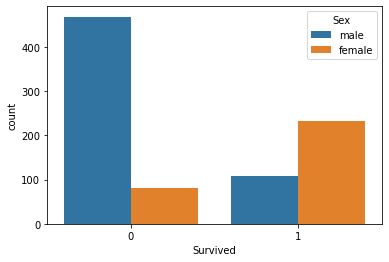

In [913]:
sns.countplot(x='Survived', hue='Sex', data=train)


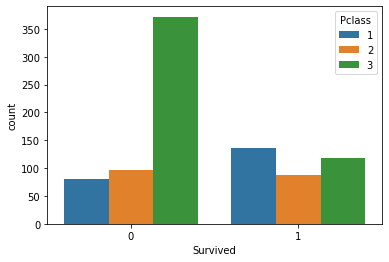

In [914]:
sns.countplot(x='Survived', hue='Pclass', data=train)


## >3 Data Pre-Processing:
 

In [915]:
#N7aydo dakchi mima3ado bach ifidna
train=train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,errors='ignore')
test=test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,errors='ignore')

In [916]:
#>Cabin Thanina mano deja(bcp ta3 NaN)

#Ghadi n3amro l'"NaNs" bl moyenne ta3 Age
print('lmotawasit ta3 lAge howa:',train["Age"].mean())
train["Age"][train["Age"].isna()] = train["Age"].mean()
test["Age"][test["Age"].isna()] = train["Age"].mean()

#Embarked : N7aydo ay Column fiha chi NaN
train.dropna(inplace=True)
test.dropna(inplace=True)


lmotawasit ta3 lAge howa: 29.69911764705882


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [917]:
#(A ou B)-> A:(1 ou 0)
train["Sex"]=pd.get_dummies(train["Sex"],drop_first=True)
test["Sex"]=pd.get_dummies(test["Sex"],drop_first=True)
#nbadlo smiya ta3 lcomu
train.rename(columns={"Sex": "Male"}, inplace=True)
test.rename(columns={"Sex": "Male"}, inplace=True)

# Q , S , C
emb_train=pd.get_dummies(train["Embarked"])
emb_test=pd.get_dummies(test["Embarked"]) 
#Train+embarked
train = pd.concat([train,emb_train],axis=1)
test = pd.concat([test,emb_test],axis=1)
#n7aydo Embarked 
train=train.drop(['Embarked'],axis=1,errors='ignore')
test=test.drop(['Embarked'],axis=1,errors='ignore')


![](https://datascienceplus.com/wp-content/uploads/2018/12/dummies_sex.png)

### >4 Data Splitting:


In [918]:
# Déja Kaggle 3awnatnabach nqasmo l'Train o Test //see Code1
#Else Use: train_test_split()

#Ghnafarqo Y 3an X man Data=(X+Y)
Y_train = train["Survived"]
X_train=train.drop(['Survived'],axis=1,errors='ignore')
#
Y_test = test["Survived"]
X_test=test.drop(['Survived'],axis=1,errors='ignore')


In [919]:
#Final Test
print(X_train)
print(X_train.count())
print('Y:',Y_train.count())


     Pclass  Male        Age  SibSp  Parch     Fare  C  Q  S
0         3     1  22.000000      1      0   7.2500  0  0  1
1         1     0  38.000000      1      0  71.2833  1  0  0
2         3     0  26.000000      0      0   7.9250  0  0  1
3         1     0  35.000000      1      0  53.1000  0  0  1
4         3     1  35.000000      0      0   8.0500  0  0  1
..      ...   ...        ...    ...    ...      ... .. .. ..
886       2     1  27.000000      0      0  13.0000  0  0  1
887       1     0  19.000000      0      0  30.0000  0  0  1
888       3     0  29.699118      1      2  23.4500  0  0  1
889       1     1  26.000000      0      0  30.0000  1  0  0
890       3     1  32.000000      0      0   7.7500  0  1  0

[889 rows x 9 columns]
Pclass    889
Male      889
Age       889
SibSp     889
Parch     889
Fare      889
C         889
Q         889
S         889
dtype: int64
Y: 889


In [920]:
print(X_test)
print(X_test.count())
print('Y:',Y_test.count())


     Pclass  Male        Age  SibSp  Parch      Fare  C  Q  S
0         3     1  34.500000      0      0    7.8292  0  1  0
1         3     0  47.000000      1      0    7.0000  0  0  1
2         2     1  62.000000      0      0    9.6875  0  1  0
3         3     1  27.000000      0      0    8.6625  0  0  1
4         3     0  22.000000      1      1   12.2875  0  0  1
..      ...   ...        ...    ...    ...       ... .. .. ..
413       3     1  29.699118      0      0    8.0500  0  0  1
414       1     0  39.000000      0      0  108.9000  1  0  0
415       3     1  38.500000      0      0    7.2500  0  0  1
416       3     1  29.699118      0      0    8.0500  0  0  1
417       3     1  29.699118      1      1   22.3583  1  0  0

[417 rows x 9 columns]
Pclass    417
Male      417
Age       417
SibSp     417
Parch     417
Fare      417
C         417
Q         417
S         417
dtype: int64
Y: 417


# 2-3-4-TRAINING ALGORITHM

In [921]:
#Ghan n'importiw l Class Ta3 L.Reg
from sklearn.linear_model import LogisticRegression

#ncreew Object mn Lclass
LogReg = LogisticRegression()

#ntriniw lmodel 
LogReg.fit(X_train,Y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [922]:
predictions = LogReg.predict(X_test)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

#  Evaluate  Model’s Performance


In [923]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       265
           1       0.90      0.91      0.91       152

    accuracy                           0.93       417
   macro avg       0.93      0.93      0.93       417
weighted avg       0.93      0.93      0.93       417



In [924]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, predictions)

array([[250,  15],
       [ 13, 139]])